# Import all the requied Modules

In [1]:
import re
import pandas as pd    
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use( 'ggplot' )
import numpy as np
from datetime import datetime, date   
from datetime import timedelta
import networkx as nx
import calendar
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Creating data frame

In [3]:
df1 = pd.read_csv("29968550_dirty_data.csv") # Data frame for dirty data
df2 = pd.read_csv("29968550_missing_value.csv") # Data frame for missing values
df3 = pd.read_csv("29968550_outliers.csv") # Data frame for outliers
# df4 = pd.read_csv("edges.csv") # Data frame for edges
# df5 = pd.read_csv("nodes.csv") # Data frame for nodes


# Cleaning 29968550_dirty_data.csv

## Checking if there is any anomoly in "Uber type"

In [4]:
# Finding unique values of uber type
print(df1['Uber Type'].unique())
# Finding data types of 'Uber type'
print(df1['Uber Type'].dtype)

[0 1 2]
int64


0    131
1    119
2     63
Name: Uber Type, dtype: int64

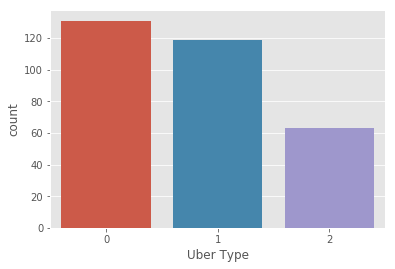

In [4]:
sns.countplot(df1['Uber Type'])
df1['Uber Type'].value_counts()

In [5]:
df1[df1['Uber Type']==0].head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1894121772,0,2,7,-37.815019,144.945159,-37.861835,144.905716,9553.0,2018-04-01,09:46:21,3194.76,10:39:35,8.70
1,ID1190628672,0,9,1,-38.110916,144.654173,-37.815365,144.941289,42145.0,2018-04-17,19:30:33,10098.54,22:18:51,15.28
3,ID1449124863,0,5,7,-37.799751,144.935380,-37.861835,144.905716,13688.0,2018-02-03,07:45:19,4282.62,8:56:41,10.78
8,ID1394393315,0,4,8,-37.802362,144.991536,-37.807202,145.026637,4298.0,2018-05-09,03:20:14,1192.32,3:40:06,11.56
9,ID1725456391,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50804.7,2018-05-06,21:58:05,13173.36,1:37:38,26.23


In [6]:
df1[df1['Uber Type']==1].head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
2,ID3408994706,1,8,9,-37.815834,145.046450,-38.110916,144.654173,51036.4,2018-07-04,21:50:32,12681.06,1:21:53,61.93
6,ID3598143669,1,4,9,-37.801144,145.003680,-38.110916,144.654173,47889.7,2018-06-20,12:00:19,11598.90,15:13:37,52.19
10,ID3812335363,1,8,2,-37.815834,145.046450,-37.825590,144.945549,9642.0,2018-05-22,23:23:44,2765.16,0:09:49,25.44
11,ID3461654630,1,2,3,-37.824820,144.928267,-37.815300,144.990285,10777.0,2018-05-08,13:49:35,2675.10,14:34:10,19.36
15,ID3177645896,1,8,5,-38.110916,144.654173,-37.799903,144.927629,44427.0,2018-04-16,14:50:19,10637.76,17:47:36,46.76


In [7]:
df1[df1['Uber Type']==2].head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
4,ID5138364089,2,3,7,-37.815406,144.977574,-37.861835,144.905716,8702.3,2018-07-06,20:03:27,3002.82,20:53:29,288.59
5,ID5337511386,2,3,5,-37.823516,144.968057,-37.809317,144.934015,4008.5,2018-03-25,12:02:32,1022.64,12:19:34,120.08
7,ID5551552295,2,1,3,-37.813078,144.955614,-37.814507,144.999935,4423.0,2018-07-25,22:12:05,1084.26,22:30:09,126.65
29,ID5450388390,2,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-04-27,09:27:58,11355.66,12:37:13,1021.45
31,ID5734885326,2,9,3,-38.110916,144.654173,-37.817451,144.970724,44067.0,2018-06-19,15:51:37,10617.24,18:48:34,962.55


#### After the careful inspection of Uber 'Id' of  every uber type from "29968550_dirty_data.csv", it can be concluded that:-
> * Uber 'Id' of 'Uber type' 0 starts with ID1 following some number 
> * Uber 'Id' of 'Uber type' 1 starts with ID3 following some number 
> * Uber 'Id' of 'Uber type' 0 starts with ID5 following some number


#### Checking if there is any anomaly from the above conclusion drawn and correcting it 

In [8]:
"""
The below code will check data from every row, and verify does "Uber type" has the same Id format, which was concluded
above.
"""
count_anomaly_in_uber_type=0
list_of_anomaly_in_uber_type=[]
for i in range(0,len(df1["Uber Type"])):
    if df1['Unnamed: 0'][i][2]=='1' and df1["Uber Type"][i] != 0:
        count_anomaly_in_uber_type+=1
        list_of_anomaly_in_uber_type.append(i)
    elif df1.iloc[i,0][2]=='3' and df1["Uber Type"][i] != 1: 
        count_anomaly_in_uber_type+=1
        list_of_anomaly_in_uber_type.append(i)
    elif df1.iloc[i,0][2]=='5' and df1["Uber Type"][i] != 2: 
        count_anomaly_in_uber_type+=1
        list_of_anomaly_in_uber_type.append(i)
print(count_anomaly_in_uber_type)

8


* So, there are 8 anomalies in the 'Uber type', based on the pattern concluded above changing the wrong type of uber to correct type

In [9]:

for i in list_of_anomaly_in_uber_type:
    # Checking if third character in Id is 1 then compute type of uber to be 0
    if df1['Unnamed: 0'][i][2] == '1':
        df1['Uber Type'][i] = 0
    # Checking if third character in Id is 3 then compute type of uber to be 1
    elif df1['Unnamed: 0'][i][2]=='3':
        df1['Uber Type'][i] = 1
    # Checking if third character in Id is 5 then compute type of uber to be 2
    elif df1['Unnamed: 0'][i][2]=='5':
        df1['Uber Type'][i] = 2

/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


## Checking anomaly in date  

* Departure Date column consists of date,month and year so the anomaly could be in any one of these. So, splitting the date in three different column, creating a new data frame and checking the anomaly in the columns column of new data frame.

In [10]:
#Splitting the Departure date into Year,month ,day and creating one new data frame for correctinf 'Departure date'.
new_date = df1['Departure Date'].apply(lambda s: pd.Series({'Year': s.split('-')[0].strip(),
                            'Month':s.split('-')[1].strip(), 'Day':s.split('-')[2].strip()}))

#### Checking anomaly in the month of the year

In [11]:
# Since month can't exceed 12, checking for errors in month if any
count_month_errors=0
list_of_index_of_errors_in_month=[]
for i in range(0,len(df1["Unnamed: 0"])):
    if((int(new_date['Month'][i])>12)):
        list_of_index_of_errors_in_month.append(i)
        count_month_errors+=1
print(count_month_errors) 

7


In [12]:
# Printing the incorrect month
for i in list_of_index_of_errors_in_month:
    print(new_date['Month'][i],new_date['Day'][i])

24 06
21 01
25 01
27 05
23 06
14 03
18 01


* Since the value of count_month_errors is 7, so there are 7 months whose value is greater than 12, and after analysing the value of these incorrect month, and looking at the value of the corresponding day of these errors. I'm exchanging the day and month value of these incorrect months

In [13]:
# Swapping the value of month to day and day to months if any anomaly found.
for i in range(0,len(df1["Unnamed: 0"])):
    # checking condition if month value is exceeding 12
      if((int(new_date['Month'][i])>12)):
        x=new_date['Month'][i]
        new_date['Month'][i]=new_date['Day'][i]
        new_date['Day'][i]=x

#### Checking for errors in feb month whether it has got more than 28 days

In [14]:
#Checking for errors for the month of feb that whether it has more than 28 days or not
count_feb=0
list_of_index_of_errors_in_month_feb=[]
for i in range(0,len(df1["Unnamed: 0"])):
    #Condition that whether feb has more than 28 days
    if new_date.iloc[i,1] in ['02'] and new_date.iloc[i,2] in ['29','30','31'] :
        list_of_index_of_errors_in_month_feb.append(i)
        count_feb+=1
count_feb

3

In [15]:
# Printing the incorrect feb month
for i in list_of_index_of_errors_in_month_feb:
    print(new_date['Month'][i],new_date['Day'][i])

02 30
02 30
02 30


* So, there are 3 incorrect feb month date
* Replacing the month value with 3 March if Feb has got more than 28 days
* Replacing the month or moving the value of month to the next and shifting the date to the 1st of that march.

In [16]:
#Correcting the errors for the feb month
for i in range(0,len(df1["Unnamed: 0"])):
    #Condition that a month got more than 28 days
     if new_date['Month'][i] in ['02'] and int(new_date['Day'][i])>28:
        new_date['Month'][i]='0'+str(int(new_date['Month'][i])+1)
        new_date['Day'][i]='01'

#### Checking in months whose date value cann't exceed more than 30

* April, June, september and november cann't have more than 30 days so checking that whether any of this month got more than 30 and corrcting it by moving the month value to next month and date to the 1st of that month.

In [17]:
#Whether the april ,june ,september and november got 31 days or not. 
count_more_than_30_days = 0
list_of_index_of_errors_in_month_exceeding_30=[]
for i in range (0,len(df1["Unnamed: 0"])):
    #Condition for months which got only 30 days .
     if new_date['Month'][i] in ['04','06','09','11'] and new_date.iloc[i,2] in['31']:
        count_more_than_30_days+=1
        list_of_index_of_errors_in_month_exceeding_30.append(i)
count_more_than_30_days

7

In [18]:
# Printing the incorrect feb month
for i in list_of_index_of_errors_in_month_exceeding_30:
    print(new_date['Month'][i],new_date['Day'][i])

04 31
04 31
04 31
04 31
06 31
06 31
06 31


* Since the value of count_more_than_30_days is 7, so there are 7 anomalies in the month date exceeding 30. Now changing the anomaly in the month and changing the value of the month and date to the next month and 1st day of the month

In [19]:
#Changing the month to the next month and giving it date of 1st of next month
for i in range (0,len(df1["Unnamed: 0"])):
    #Condition for checking that months which got 31 days
     if new_date['Month'][i] in ['04','06','09','11'] and new_date.iloc[i,2]=='31':
        new_date['Month'][i]='0' + str(int(new_date['Month'][i])+1)
        new_date['Day'][i]='01'

#### Updating the data data frame df1 of  "29968550_dirty_data.csv" to updated date.

In [20]:
# Updating the date in the df1
df1['Departure Date'] = new_date['Year']+'-'+new_date['Month']+'-'+new_date['Day']

## Checking anomaly in Origin latitude of "29968550_dirty_data.csv"

count    313.000000
mean     -36.636988
std        9.500622
min      -38.110916
25%      -37.821044
50%      -37.813762
75%      -37.805128
max       37.815672
Name: Origin Latitude, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


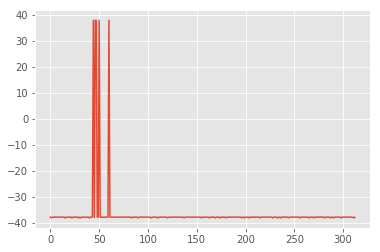

In [21]:
print(df1['Origin Latitude'].describe())
print(df1['Origin Latitude'].plot())

* After examining the 'Origin latitude' statistics and plot, except few all other 'Origin latitude' are negative.
* After plotting the "29968550_dirty_data.csv" in tableau, there are few latitude whose value is positive.
* So, it can be concluded that all the 'Origin latitude' values are negative and there are few value of 'Origin latitude' which is positive.
* So, converting those positive values to negative 

In [22]:
# Check that whether the origin latitude has got some positive value.
count_origin_positive = 0
for i in range(0,len(df1["Unnamed: 0"])):
    if df1["Origin Latitude"][i]>0:
        count_origin_positive+=1 
count_origin_positive

5

* So there are 5 Origin Latitude which in incorrect, that need to be converted to negative.
* Below code chunk will convert the positive Origin Latitude to negative

In [23]:
for i in range(0,len(df1["Unnamed: 0"])):
    # Checking if Destination Latitude is Positive 
    if df1["Origin Latitude"][i]>0:
        # If positive Destination Latitude is found, converting it to negative
        df1["Origin Latitude"][i]=(df1["Origin Latitude"][i]*-1)  

/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Checking anomaly in Origin longitude of "29968550_dirty_data.csv"

count    313.000000
mean     144.940491
std        0.105835
min      144.654173
25%      144.932506
50%      144.973257
75%      144.998124
max      145.046450
Name: Origin Longitude, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


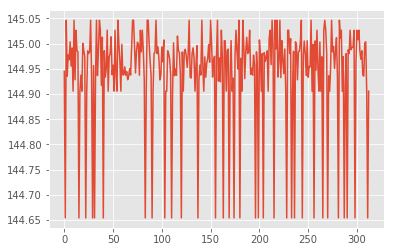

In [24]:
print(df1['Origin Longitude'].describe())
print(df1['Origin Longitude'].plot())

In [25]:
count_origin_longitude = 0
for i in range(0,len(df1["Unnamed: 0"])):
    if df1["Origin Latitude"][i]>0:
        count_origin_longitude+=1 
print(count_origin_longitude)

0


* Since there is no anomaly in the 'Origin longitude' so, no change is required as 'Origin latitude is in format'

## Checking anomaly in destination latitude of "29968550_dirty_data.csv"

count    313.000000
mean     -36.641532
std        9.509319
min      -38.110916
25%      -37.824904
50%      -37.815236
75%      -37.807202
max       38.110916
Name: Destination Latitude, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


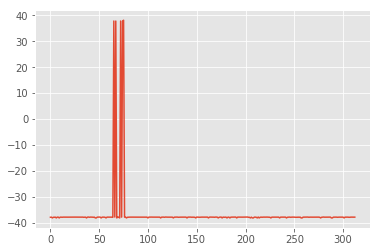

In [26]:
print(df1['Destination Latitude'].describe())
print(df1['Destination Latitude'].plot())



* After examining the 'Destination latitude' statistics and plot, except few all other 'Origin region' are negative.
* After plotting the "29968550_dirty_data.csv" in tableau, there are few whose value is positive.
* So, it can be concluded that all the 'Destination latitude' values are negative and there are few value of 'Destination latitude' which is positive.
* So, converting those positive values to negative 

In [27]:
# Check that whether the origin latitude has got some positive value.
count_destination_positive = 0
for i in range(0,len(df1["Unnamed: 0"])):
    if df1["Destination Latitude"][i]>0:
        count_destination_positive+=1 
count_destination_positive

5

* So there are 5 Destination Latitude which in incorrect, these need to be converted to negative.
* Below code chunk will convert the positive Origin Latitude to negative

In [28]:
for i in range(0,len(df1["Unnamed: 0"])):
    # Checking if Destination Latitude is Positive
    if df1["Destination Latitude"][i]>0:
        # If positive Destination Latitude is found, converting it to negative 
        df1["Destination Latitude"][i]=(df1["Destination Latitude"][i]*-1)  

/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


 ## Examining anomaly in the 'Destination Longitude'

count    313.000000
mean     144.930358
std        0.108727
min      144.654173
25%      144.917442
50%      144.951793
75%      144.995686
max      145.046450
Name: Destination Longitude, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


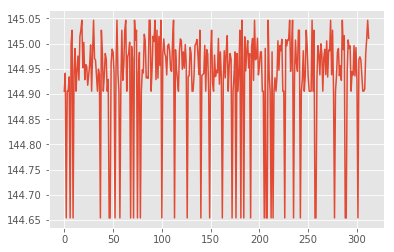

In [29]:
print(df1['Destination Longitude'].describe())
print(df1['Destination Longitude'].plot())

In [30]:
# Checking if there is any anomaly in the 'Destination Longitude'
count_error_destination_longitude = 0
for i in range(0,len(df1["Unnamed: 0"])):
    if df1["Origin Latitude"][i]>0:
        count_error_destination_longitude+=1 
print(count_error_destination_longitude)

0


* Since the count_error_destination_longitude  value is zero, so there is no anomaly in 'Destination Longitude', so making no change.

## Examining anomaly in the 'Origin region'

#### Graph of clustered longitude and latitude of destination, to visualize that is there any anomaly in the region.

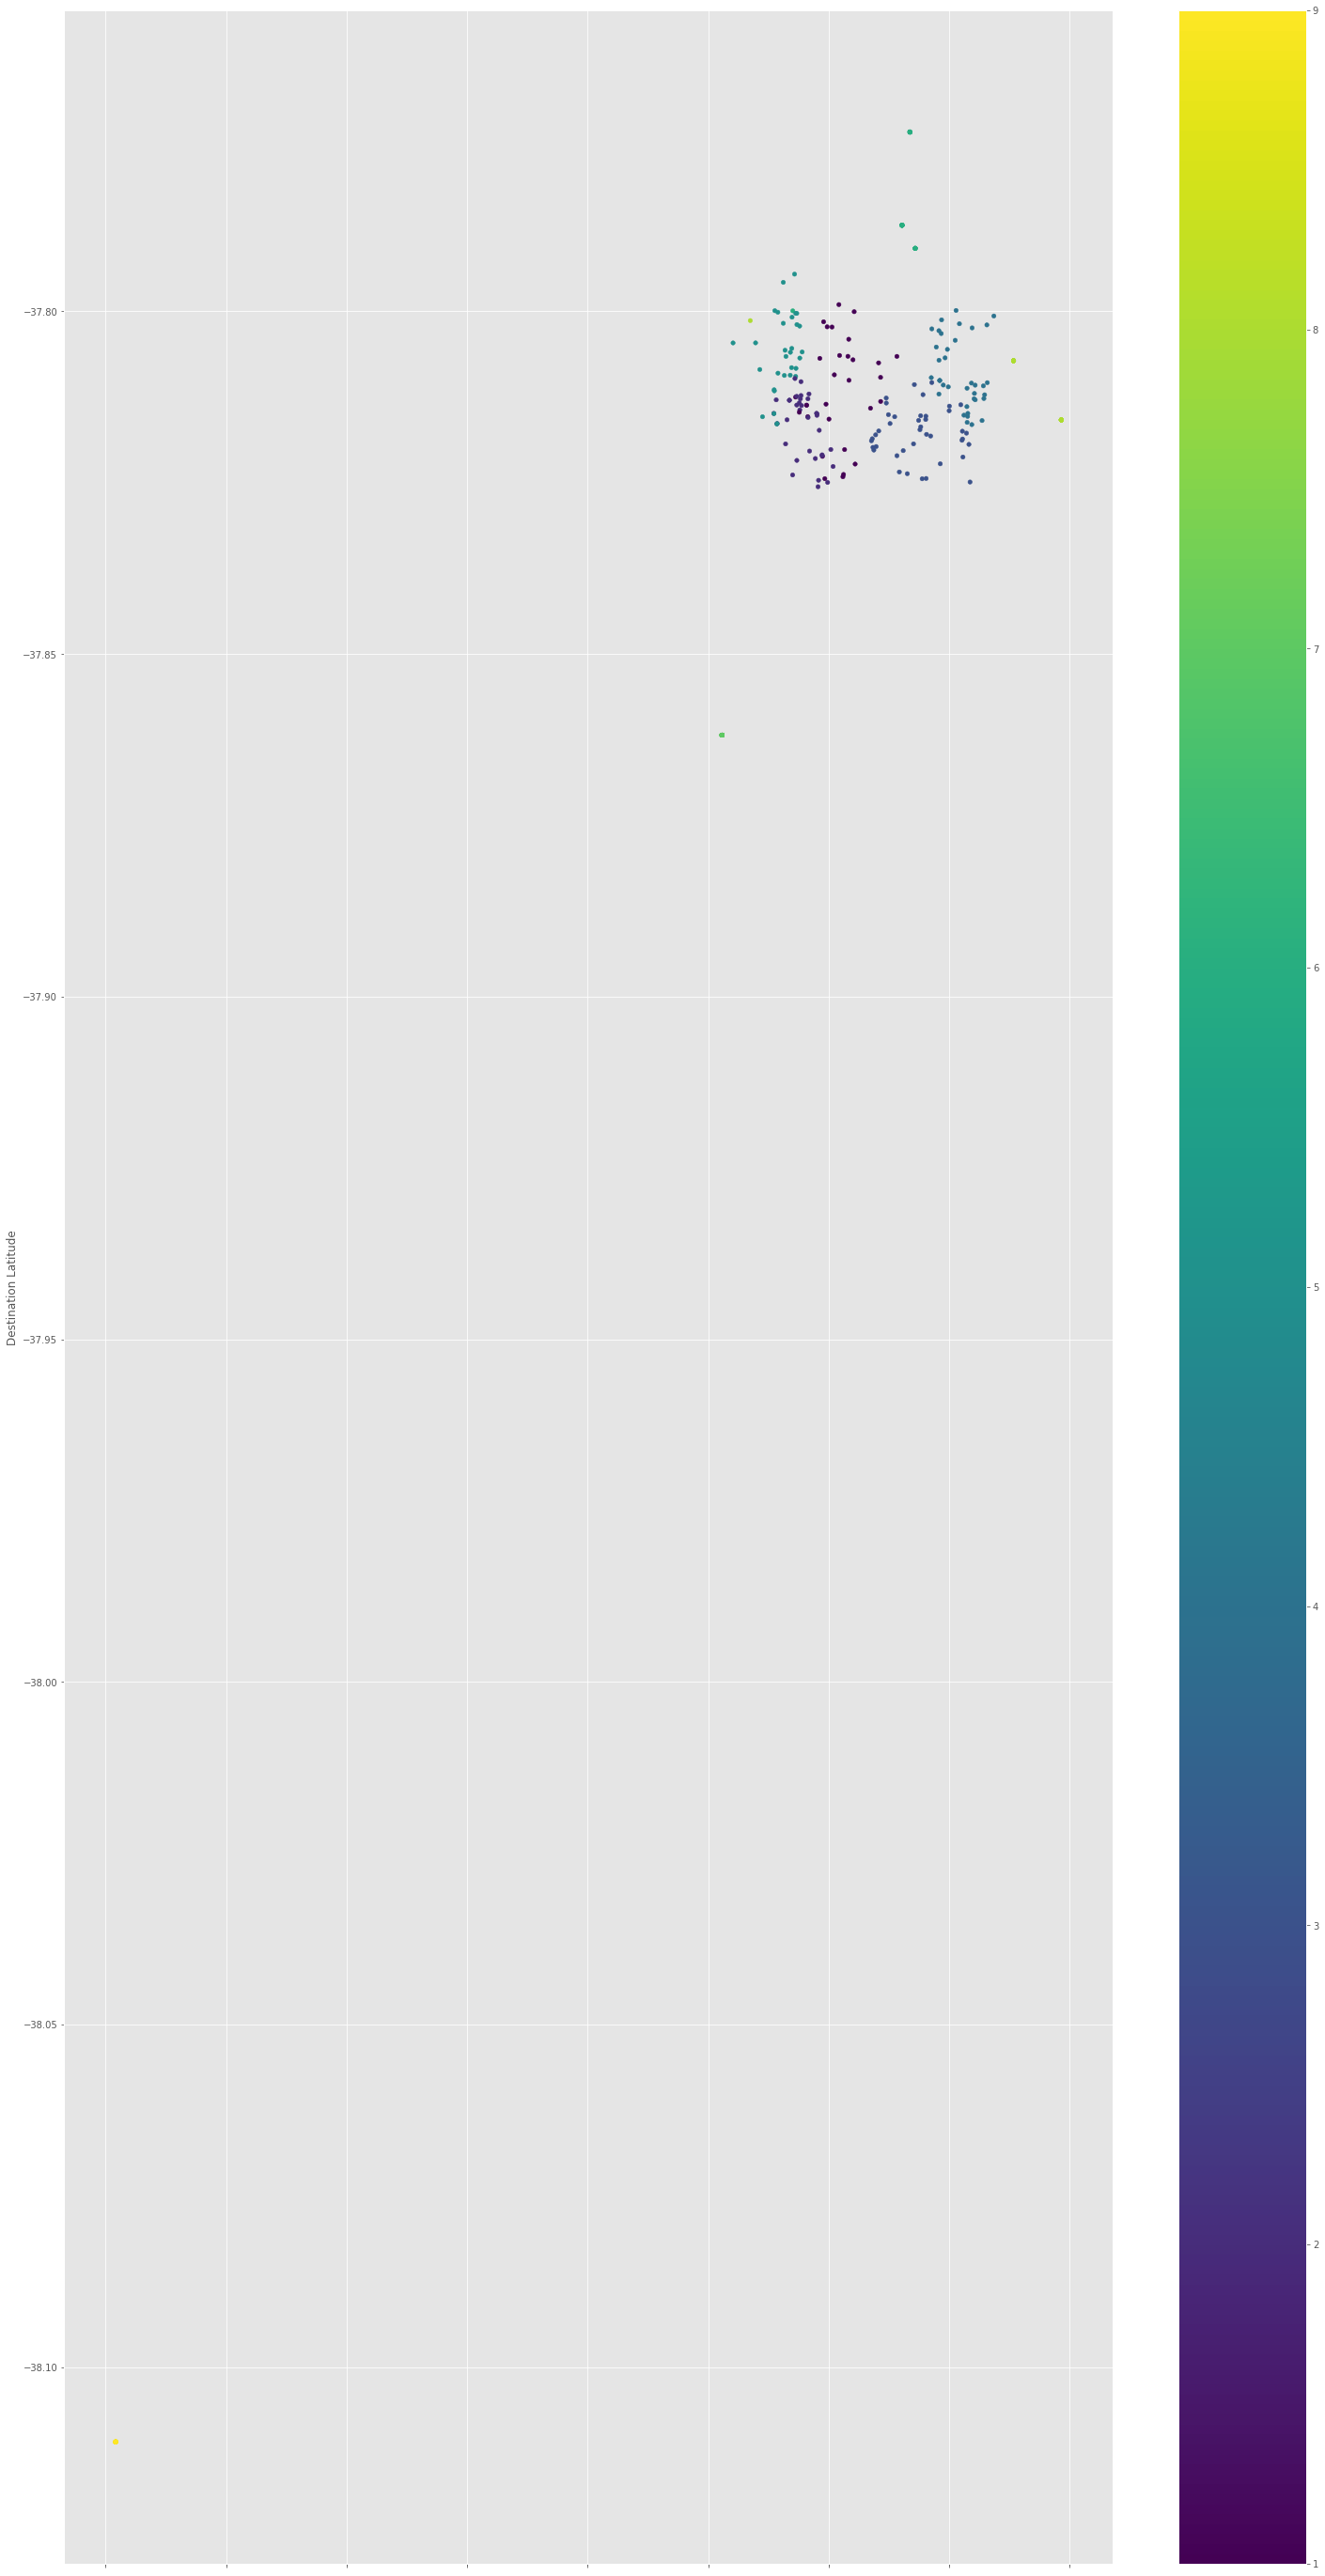

In [31]:
df1.plot.scatter(x='Destination Longitude',y='Destination Latitude' ,figsize=(25,50),c = df1['Destination Region'].values,colormap='viridis')

* So, from the graph it can be observed that the there are many destination latitude and longitude which is not in their clustered region.
* These regions needs to be corrected
#### Using KNN to predict the nearest neighbour value.
* I'm using the k Nearest Neighbours clustering algorithm to determine the given regions are correctly determined 

In [32]:
f1=df1[["Destination Latitude","Destination Longitude"]] # f1 has all the destinationLatitude and destination Longitude
f2=df1["Destination Region"] # f2 has all the destination Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Destination Latitude","Destination Longitude"]])
cw=0 # To keep count of how many destination region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Destination Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Destination Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Destination Region",cw)

corrections in Destination Region 20


In [33]:
f1=df1[["Destination Latitude","Destination Longitude"]] # f1 has all the destinationLatitude and destination Longitude
f2=df1["Destination Region"] # f2 has all the destination Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Destination Latitude","Destination Longitude"]])
cw=0 # To keep count of how many destination region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Destination Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Destination Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Destination Region",cw)

corrections in Destination Region 3


In [34]:
f1=df1[["Destination Latitude","Destination Longitude"]] # f1 has all the destinationLatitude and destination Longitude
f2=df1["Destination Region"] # f2 has all the destination Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Destination Latitude","Destination Longitude"]])
cw=0 # To keep count of how many destination region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Destination Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Destination Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Destination Region",cw)

corrections in Destination Region 1


In [35]:
f1=df1[["Destination Latitude","Destination Longitude"]] # f1 has all the destinationLatitude and destination Longitude
f2=df1["Destination Region"] # f2 has all the destination Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Destination Latitude","Destination Longitude"]])
cw=0 # To keep count of how many destination region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Destination Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Destination Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Destination Region",cw)

corrections in Destination Region 0


* So, there were 20 destination region which was not in at their correct region 

## Examining anomaly in the 'Origin Region'

#### Graph of clustered longitude and latitude of origin, to visualize that is there any anomaly in the region.

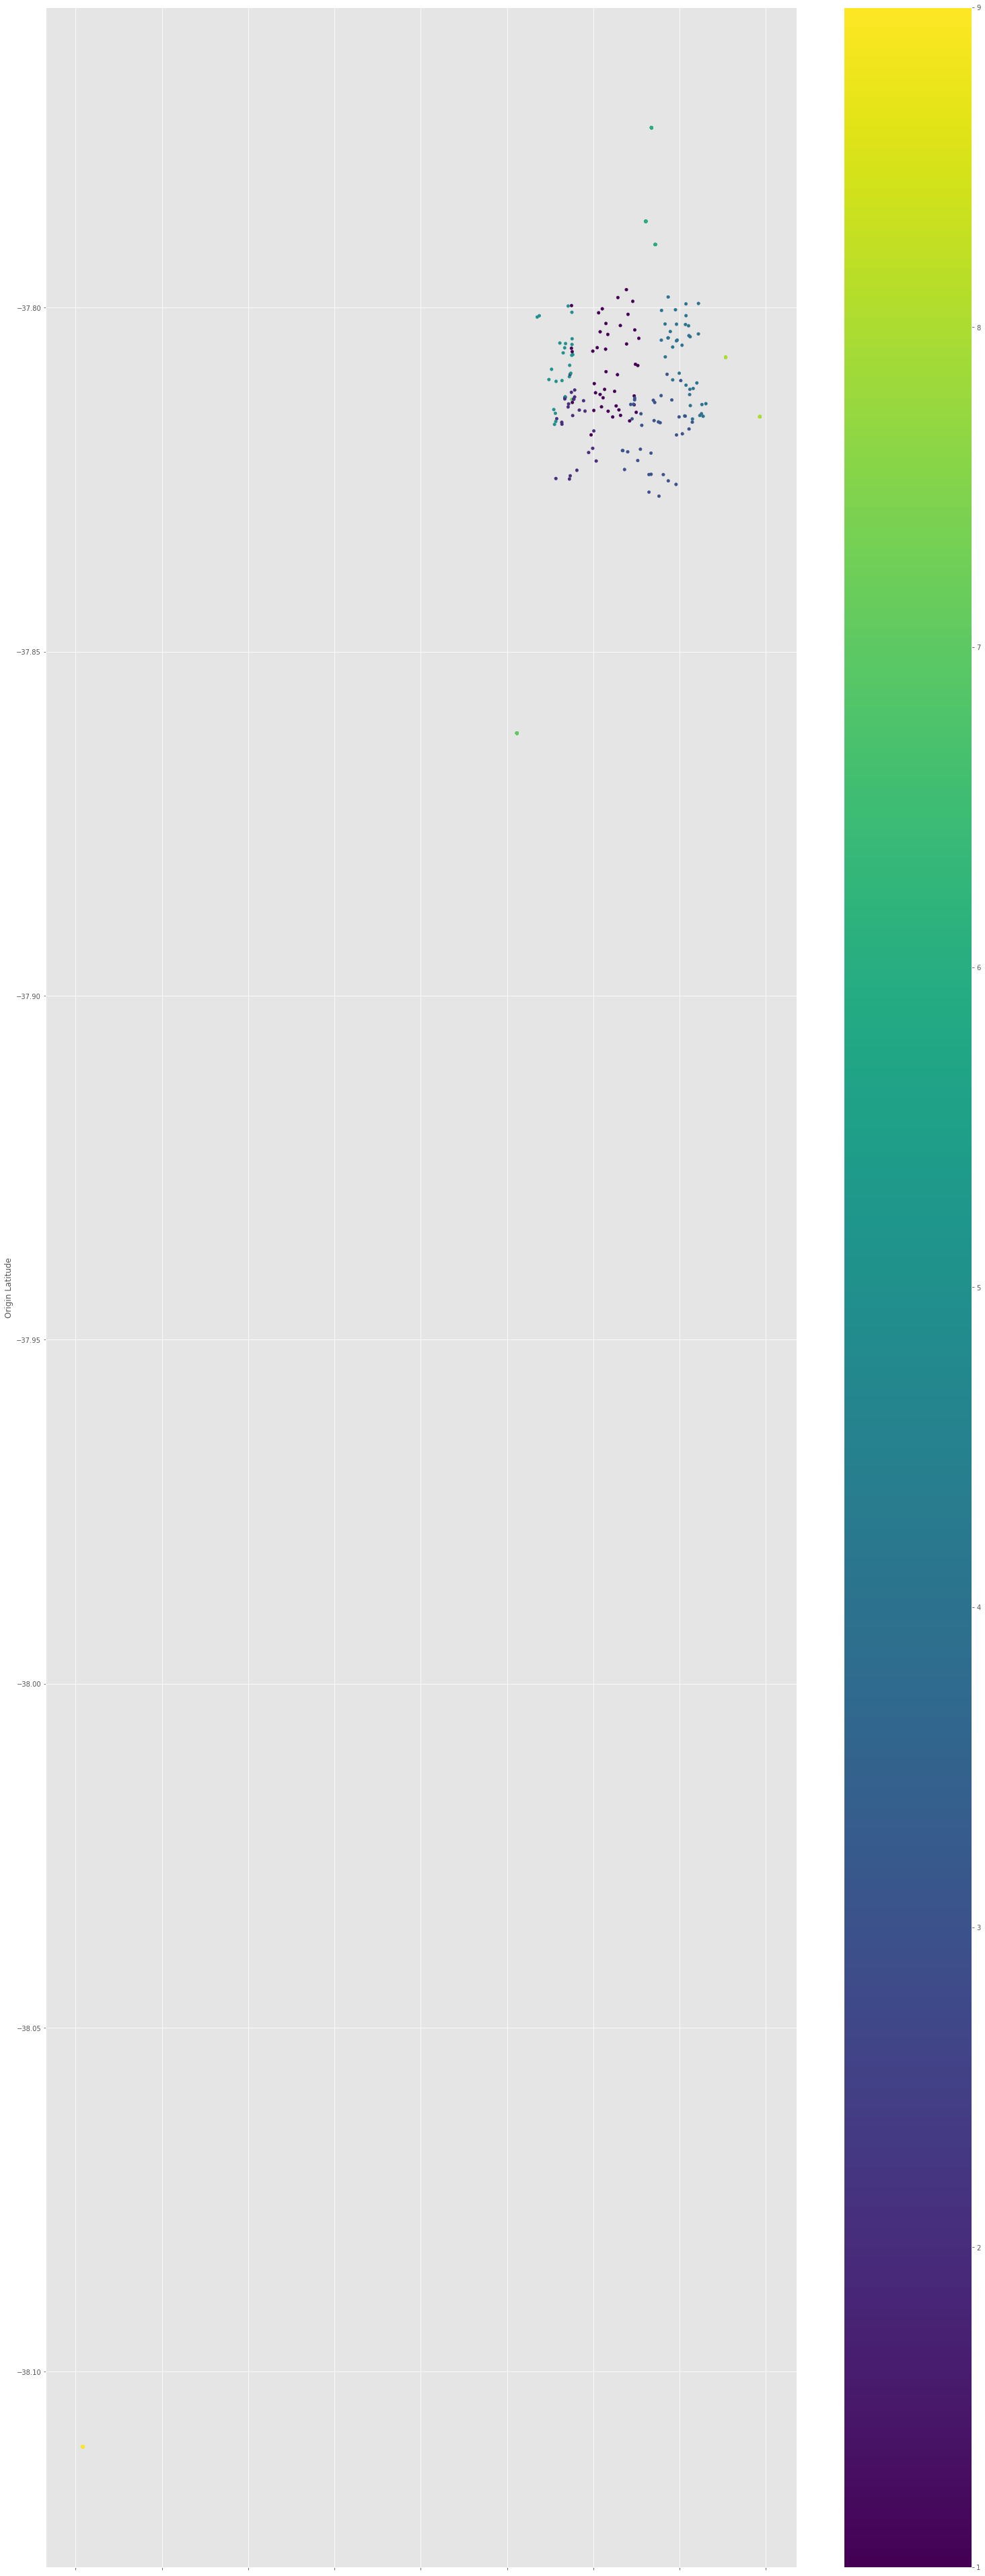

In [36]:
df1.plot.scatter(x='Origin Longitude',y='Origin Latitude' ,figsize=(25,70),c = df1['Origin Region'].values,colormap='viridis')

* So, from the graph it can be seen that the there are many origin latitude and longitude which is not in their clustered region.
* These regions needs to be corrected
#### Using KNN to predict the nearest neighbour value.
* I'm using the k Nearest Neighbours clustering algorithm to determine the given regions are correctly determined 

In [37]:
f1=df1[["Origin Latitude","Origin Longitude"]] # f1 has all the Origin Latitude and Origin Longitude
f2=df1["Origin Region"] # f2 has all the Origin Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Origin Latitude","Origin Longitude"]])
cw=0 # To keep count of how many origin region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Origin Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Origin Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Origin Region",cw)

corrections in Origin Region 19


In [38]:
f1=df1[["Origin Latitude","Origin Longitude"]] # f1 has all the Origin Latitude and Origin Longitude
f2=df1["Origin Region"] # f2 has all the Origin Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Origin Latitude","Origin Longitude"]])
cw=0 # To keep count of how many origin region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Origin Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Origin Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Origin Region",cw)

corrections in Origin Region 1


In [39]:
f1=df1[["Origin Latitude","Origin Longitude"]] # f1 has all the Origin Latitude and Origin Longitude
f2=df1["Origin Region"] # f2 has all the Origin Region
f2.values.reshape(-1,1) 
cl = KNeighborsClassifier()
cl.fit(f1,f2)
p = cl.predict(df1[["Origin Latitude","Origin Longitude"]])
cw=0 # To keep count of how many origin region were incorrect.
for i in df1.index:
    # Comparision of the predicted region with the region given in data set.
    if p[i] != df1.iloc[i]['Origin Region']:
        # If the region is not equal then changing the region value to the predicted region
        df1.at[i,"Origin Region"]= p[i]
        # Incrementing count if any change occour.
        cw+=1
print("corrections in Origin Region",cw)

corrections in Origin Region 0


* So, there were 19 origin region which was not in at their correct region 

## Examining anomaly in the Journey Ditsance(m) 

* Creating a grapgh from networkx package of pyton from the edges given in the data set.

In [40]:
G = nx.from_pandas_edgelist(df4, 'u', 'v', ['distance(m)']) # Graph of nodes from df4 = edge.csv

In [41]:
# source_node has the nodes id for Origin Latitude and Origin Longitude in df1
# Merging df1 and df5 to get the origin node
source_node = pd.merge(df1,df5,left_on = ['Origin Latitude','Origin Longitude'],right_on = ['lat','lon'],how='left')
# Renaming source_node columns 'Unnamed: 0' to u
source_node.rename(columns={"Unnamed: 0_y":"u"},inplace=True)
# destination_node has the nodes id for Destination Latitude and Destination Longitude in dirty_data.csv which is df1
# Merging df1 and df5 to get the destination node
destination_node = pd.merge(df1,df5,left_on = ['Destination Latitude','Destination Longitude'],right_on = ['lat','lon'],how='left')
# Renaming source_node columns 'Unnamed: 0' to u
destination_node.rename(columns={"Unnamed: 0_y":"v"},inplace=True)

In [42]:
"""
There are some rows in destination_node which has more than one node id for one 'Destination Latitude' and '
Destination Longitude'.
It was emailed by our lecturer to keep the first record, delete the other record. So, below code will find out the 
destination_node which has more than one node id for one 'Destination Latitude' and 'Destination Longitude' and keep 
the row id in the list indexes.
"""
indexes=[]
for i in range(len(destination_node)):
    for j in range(len(destination_node)):
        if (destination_node.iloc[i,6],destination_node.iloc[i,7])==(destination_node.iloc[j,6],destination_node.iloc[j,7]) and destination_node.iloc[i,14]!=destination_node.iloc[j,14] and i!=j:
            indexes.append(j)
inx=set(indexes)
inx=list(inx)
inx=inx[1:]
print(inx)
# dropping the destination_node in indexes list
destination_node.drop(destination_node.index[inx], inplace=True)
# Resetting the index of destination_node
destination_node.reset_index(inplace=True)
# Dropping the extra column 'index' from destination_node
destination_node.drop(columns=["index"],inplace=True)

[44, 45]


In [43]:
distance_list = [] # distance_list has the shortest distance of every start and end node.
for i in range(len(df1)):
    distance, path = nx.bidirectional_dijkstra(G,source=source_node['u'][i], target=destination_node['v'][i], weight = 'distance(m)')
    distance_list.append(distance)

In [44]:
# To check number of rows that has different distance than the calculated shortest distance
count_index_of_different_distance = 0 
# List to store the distance that is different from calculated shortest distance
list_of_index_different_distance = []
for i in range(len(df1)):
    if distance_list[i] != df1['Journey Distance(m)'][i]:
        count_index_of_different_distance+=1
        list_of_index_different_distance.append(i)
print(count_index_of_different_distance)

5


* So, there are 5  'Journey Distance(m)' in dirty_data.csv which was not the shortest, substituting those 5 values of df1 with the calculated shortest distance.

In [45]:
# Changing the shortest distance in df1 
for i in list_of_index_different_distance:
    df1['Journey Distance(m)'][i] = distance_list[i]

/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until



## Examining anomaly in 'Travel time' , 'Departure Time', 'Arrival time'  


#### Examing if any departing time starts after the Arrival time

In [46]:
# This code underneath will check wether 'Departure Time' starts after 'Arrival Time' 
count_dept_more_than_arrival = 0
list_of_index_of_dept_more_than_arrival = []
print("In the below cases Departure time is higher than Arrival time")
for i in range(len(df1)):
    if datetime.strptime(df1['Departure Time'][i], '%H:%M:%S').time() > datetime.strptime(df1['Arrival Time'][i], '%H:%M:%S').time():
        t1 = datetime.strptime(df1['Arrival Time'][i],"%H:%M:%S").time()
        t2 = datetime.strptime(df1['Departure Time'][i],"%H:%M:%S").time()
        if t2.hour-t1.hour < 12:
            count_dept_more_than_arrival+=1
            list_of_index_of_dept_more_than_arrival.append(i)
            print('Departure Time',df1['Departure Time'][i],'Arrival Time',df1['Arrival Time'][i])

In the below cases Departure time is higher than Arrival time
Departure Time 9:24:13 Arrival Time 08:34:25
Departure Time 6:24:24 Arrival Time 03:26:46
Departure Time 22:26:09 Arrival Time 19:19:10
Departure Time 10:30:08 Arrival Time 09:40:59
Departure Time 18:49:02 Arrival Time 18:26:29
Departure Time 9:45:19 Arrival Time 09:26:42
Departure Time 17:44:09 Arrival Time 17:12:01
Departure Time 8:06:27 Arrival Time 07:27:10
Departure Time 10:49:28 Arrival Time 07:53:18
Departure Time 8:34:49 Arrival Time 04:54:45


* After careful examination of 'Departure Time' and 'Arrival Time', it can be noticed that there are some 'Departure Time' which start after the 'Arrival Time'. So those are anomolies.
* To remove these anomalies I'm swapping the 'Departure Time' and 'Arrival Time'.

In [47]:
for i in list_of_index_of_dept_more_than_arrival:
    # Swapping the time.
        swap_to_arrival = df1['Departure Time'][i]
        swap_to_departure = df1['Arrival Time'][i]
        df1['Departure Time'][i] = swap_to_departure
        df1['Arrival Time'][i] = swap_to_arrival
    

/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/aksingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


* Function to calculate 'Travel Time'

In [48]:
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)

    return tt

In [49]:
count_different_time = 0
for i in source_node.index:
    path = nx.dijkstra_path(G,source_node['u'][i], destination_node['v'][i], weight = 'distance(m)')
    travel_time=round(traveltime(path,df4),2)
    if travel_time!=round(df1['Travel Time(s)'][i],2):
        count_different_time += 1
#         print(travel_time,':',df1['Travel Time(s)'][i])
        df1.at[i,'Travel Time(s)']=travel_time
print(count_different_time)

19


# Finding Missing Values In 29968550_missing_value

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
Unnamed: 0               107 non-null object
Uber Type                85 non-null float64
Origin Region            107 non-null int64
Destination Region       107 non-null int64
Origin Latitude          107 non-null float64
Origin Longitude         107 non-null float64
Destination Latitude     107 non-null float64
Destination Longitude    107 non-null float64
Journey Distance(m)      107 non-null float64
Departure Date           107 non-null object
Departure Time           107 non-null object
Travel Time(s)           107 non-null float64
Arrival Time             107 non-null object
Fare$                    87 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 11.8+ KB


* So, there are 22 missing values in the Uber Type
* There are 20 missing values in the Fares$

In [51]:
# Renaming missing_value columns
df2.rename(columns={"Unnamed: 0":"Id"},inplace=True)
# Renaming missing_value columns
df2.rename(columns={"Fare$":"Fare"},inplace=True)
df2.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare
0,ID5259808658,NaN,8,6,-37.807202,145.026637,-37.773845,144.983689,8606.0,2018-07-15,13:18:43,2001.84,13:52:04,176.63
1,ID1636186941,NaN,7,4,-37.861835,144.905716,-37.808925,145.008836,12067.0,2018-04-16,00:30:33,3818.40,1:34:11,15.49
2,ID3674911830,1.0,6,1,-37.790797,144.985865,-37.811828,144.967575,3443.0,2018-03-17,23:41:36,982.68,23:57:58,23.95
3,ID3809401056,NaN,6,1,-37.773845,144.983689,-37.821160,144.955435,6554.0,2018-06-17,06:48:46,1438.38,7:12:44,16.15
4,ID1856834077,NaN,2,4,-37.815214,144.935503,-37.803361,144.990553,6308.0,2018-04-15,13:32:13,1539.84,13:57:52,13.06


### Computing Missing values in uber type

#### From the conclusion made in dirty_data :-
> * Uber 'Id' of 'Uber type' 0 starts with ID1 following some number 
> * Uber 'Id' of 'Uber type' 1 starts with ID3 following some number 
> * Uber 'Id' of 'Uber type' 0 starts with ID5 following some number
#### Computing Uber type 

* Imputing the value of these 22 missing values of uber type from conclusion drawn 

In [52]:
# Assigning UberType as per TripID
df2.loc[(df2['Id'].str[:3] == 'ID1'), "Uber Type"] = 0.0
df2.loc[(df2['Id'].str[:3] == 'ID3'), "Uber Type"] = 1.0
df2.loc[(df2['Id'].str[:3] == 'ID5'), "Uber Type"] = 2.0

### Computing Missing values in Fare

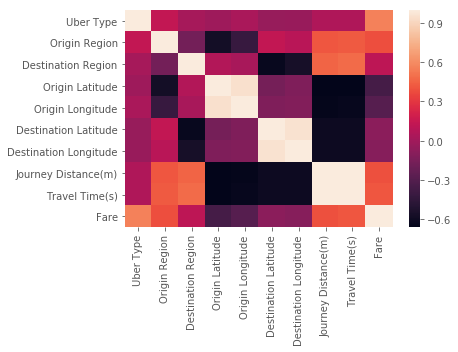

In [53]:
correlation = df2.corr()
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

Looks like Fare has the most relation with **Uber Type**, **Journey Distance** and **Travel Time**. Lets try to visualize the linear relationship of Fare with Journey Distance and Travel time. 

* After reading the assessment 2 specification, it can be inferred that the fare of the journey depends on many variable
* The enumeration of variable that fare depend on are:-

> * Uber Type
> * Journey Distance
> * Departure Date
> * Departure Time
> * Travel Time

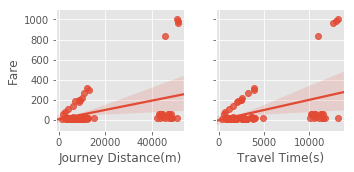

In [54]:
sns.pairplot(df2, x_vars=['Journey Distance(m)','Travel Time(s)'], y_vars='Fare', kind='reg');

Looks like there is some disconnect in the relationship. There seems to be a trend but with a condition. Lets visualize this for each different Uber Type

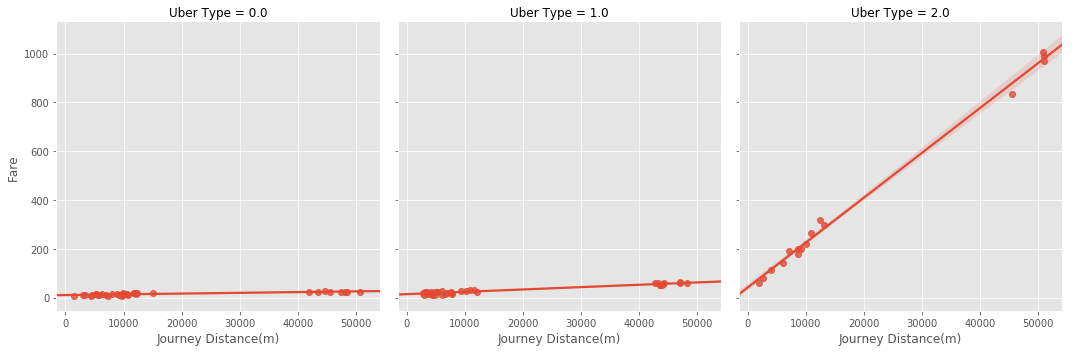

In [55]:
sns.lmplot('Journey Distance(m)','Fare', col = 'Uber Type',data = df2);

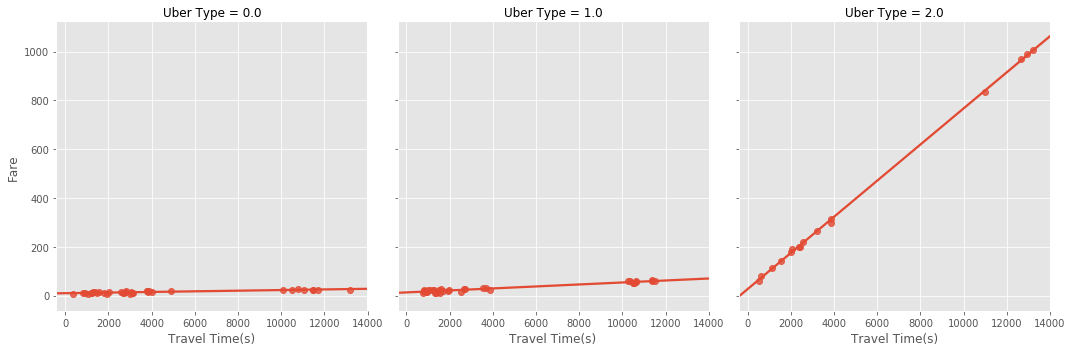

In [56]:
sns.lmplot('Travel Time(s)','Fare', col = 'Uber Type',data = df2);

As it is described in the specification document there is a different way to calculate the fare for each Uber Type. So when we plot the corelations for different Uber Types on Different graphs, the linear relation is quite visible. Lets create a individual Model to predict the missing Fare values for each UberType.

There are two numerical columns that can be created which would also be good predictors - **Time of Day** of the trip and another variable to indicate if it was a **weekend**

Time of Day is defined as follows:
> * 06:00:00 to 11:59:00 -> 0
> * 12:00:00 to 20:59:59 -> 1
> * 21:00:00 or Before 5:59:59 -> 2

In [57]:
lis_of_time_category=[]
for i in df2["Departure Time"]:
    #searching for the digits pattern
    
    if re.search(r'\d+:\d+:\d+',i):
        
        j=re.search(r'(\d+):\d+:\d+',i).group(1)
        #condition to 
    
        if int(j)>=6 and int(j)<=11:
            lis_of_time_category.append(0)
        elif int(j)>=12 and int(j)<=20:
            lis_of_time_category.append(1)
        else:
            lis_of_time_category.append(2) 
df2["TimeOfDay"] = lis_of_time_category

* Weekdays or Weekend is defined as follows:

In [58]:
# Creating a column to indicate if its weekend. 
df2['Departure Date'] = pd.to_datetime(df2['Departure Date'])
df2['weekend'] = np.where(df2['Departure Date'].dt.dayofweek > 4, 1, 0)

In [59]:
#Creating individual dataframes for each ubertype
ut0 = df2[df2['Uber Type'] == 0].copy()
ut1 = df2[df2['Uber Type'] == 1].copy()
ut2 = df2[df2['Uber Type'] == 2].copy()

# Creating dataframes without missing values of Fare
drop_null_df2 = df2.copy()
drop_null_df2.dropna(subset=['Fare'], axis=0, inplace = True)
dropped_ut0 = drop_null_df2[drop_null_df2['Uber Type'] == 0]
dropped_ut1 = drop_null_df2[drop_null_df2['Uber Type'] == 1]
dropped_ut2 = drop_null_df2[drop_null_df2['Uber Type'] == 2]

In [60]:
# Setting up linear regression
lm_ut0 = LinearRegression()
lm_ut1 = LinearRegression()
lm_ut2 = LinearRegression()

In [61]:
# Creating fitted model for each Uber Type using only useful columns
useful_cols = ['Journey Distance(m)','Travel Time(s)','TimeOfDay','weekend']
lm_ut0.fit(dropped_ut0[useful_cols],dropped_ut0['Fare'])
lm_ut1.fit(dropped_ut1[useful_cols],dropped_ut1['Fare'])
lm_ut2.fit(dropped_ut2[useful_cols],dropped_ut2['Fare'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
# Fare Prediction stored in new column - lm_fare
ut0['lm_fare'] = lm_ut0.predict(ut0[useful_cols])
ut1['lm_fare'] = lm_ut1.predict(ut1[useful_cols])
ut2['lm_fare'] = lm_ut2.predict(ut2[useful_cols])

In [63]:
# Merging data for all 3 uber types
fare_predicted = pd.concat([ut0,ut1, ut2])
fare_predicted.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare,TimeOfDay,weekend,lm_fare
1,ID1636186941,0.0,7,4,-37.861835,144.905716,-37.808925,145.008836,12067.0,2018-04-16,00:30:33,3818.40,1:34:11,15.49,2,0,16.081171
4,ID1856834077,0.0,2,4,-37.815214,144.935503,-37.803361,144.990553,6308.0,2018-04-15,13:32:13,1539.84,13:57:52,13.06,1,1,13.039664
5,ID1485351111,0.0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-06-04,08:43:00,13204.98,12:23:04,24.90,0,0,24.187650
10,ID1790307124,0.0,5,4,-37.799483,144.936846,-37.807383,144.994180,5304.0,2018-03-22,21:45:22,1397.58,22:08:39,14.48,2,0,12.626368
12,ID1950477834,0.0,5,6,-37.811360,144.927209,-37.787442,144.980409,6946.0,2018-05-13,07:18:10,1794.96,7:48:04,9.19,0,1,10.535686


In [64]:
# Merging predicted fare into missing data frame
df2 = pd.merge(df2,fare_predicted[['Id','lm_fare']], on = ['Id'], how = 'left')

# Creating a new copy and dropping the missing values for evaluating the fit.
drop_null_df2 = df2.copy()
drop_null_df2.dropna(subset=['Fare'], axis=0, inplace = True)


In [65]:
#Model evaluation
rsquare0 = r2_score(drop_null_df2[drop_null_df2['Uber Type'] == 0].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 0].lm_fare)
rmse0 = mean_squared_error(drop_null_df2[drop_null_df2['Uber Type'] == 0].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 0].lm_fare)
print("R-squared score for UberType=0 linear model: ",rsquare0)
print("RMSE for UberType=0 linear model: ",rmse0,"\n")

rsquare1 = r2_score(drop_null_df2[drop_null_df2['Uber Type'] == 1].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 1].lm_fare)
rmse1 = mean_squared_error(drop_null_df2[drop_null_df2['Uber Type'] == 1].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 1].lm_fare)
print("R-squared score for UberType=0 linear model: ",rsquare1)
print("RMSE for UberType=0 linear model: ",rmse1,"\n")

rsquare2 = r2_score(drop_null_df2[drop_null_df2['Uber Type'] == 2].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 2].lm_fare)
rmse2 = mean_squared_error(drop_null_df2[drop_null_df2['Uber Type'] == 2].Fare, drop_null_df2[drop_null_df2['Uber Type'] == 2].lm_fare)
print("R-squared score for UberType=0 linear model: ",rsquare2)
print("RMSE for UberType=0 linear model: ",rmse2,"\n")

R-squared score for UberType=0 linear model:  0.9780104417965257
RMSE for UberType=0 linear model:  0.6733274035262706 

R-squared score for UberType=0 linear model:  0.9968875211599222
RMSE for UberType=0 linear model:  0.954938828507288 

R-squared score for UberType=0 linear model:  0.9999956592075405
RMSE for UberType=0 linear model:  0.49634098797306486 



In [66]:
# Replacing missing values with predicted values
df2.loc[df2.Fare.isnull(),'Fare'] = df2.loc[df2.Fare.isnull(),'lm_fare']

In [67]:
print("Number of missing values in Fare Column: ", df2.Fare.isnull().sum())
df2[df2.Fare.isnull()]

Number of missing values in Fare Column:  0


,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare,TimeOfDay,weekend,lm_fare


# Finding outliers in "29968550_outliers.csv"

###  Using box plot investigate possible outliers

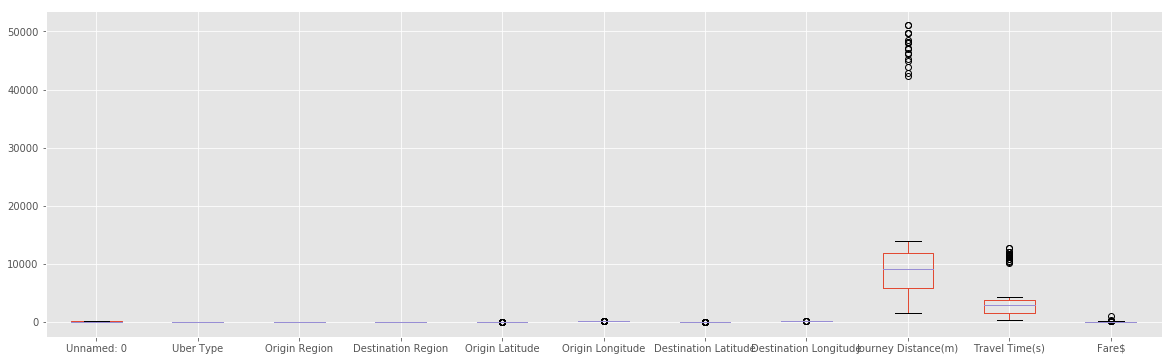

In [68]:
plt.figure(figsize=(20,6))
bp = df3.boxplot()

* The first thing to notice is that 'Journey Distance(m)','Fare'and 'Travel Time' has many outliers.
* However, plotting all data together might not be right because of the different ranges of attributes. Therefore, we look at one attribute at a time instead. 

#### Function for removing outliers.
* The remove_outlier function has two arguments.
>  1) Data Frame
>  2 ) Column Name
* remove_outlier finds the inter-quartile range(IQR) and then removes values that lie 1.5 * IQR away from upper or lower quantile as they are considered as outliers.

In [69]:
def remove_outlier(data_frame,column):
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_frame.loc[(data_frame[column] < (Q1 - 1.5 * IQR)) | (data_frame[column] > (Q3 + 1.5 * IQR))]
    return data_frame.drop(outliers.index)

#### Examining outliers in travel time

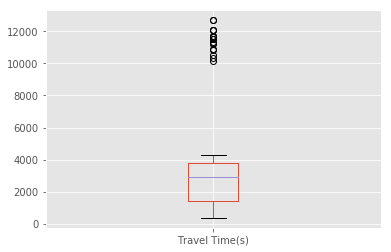

In [70]:
df3.boxplot(column='Travel Time(s)')

* Removing outliers from travel time

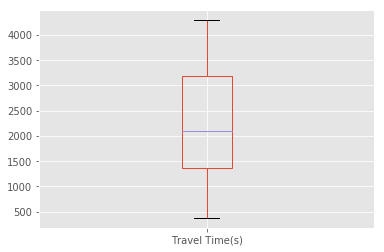

In [71]:
df3 = remove_outlier(df3, "Travel Time(s)")
df3.boxplot(column='Travel Time(s)')

#### Examining outliers in Journey Distance

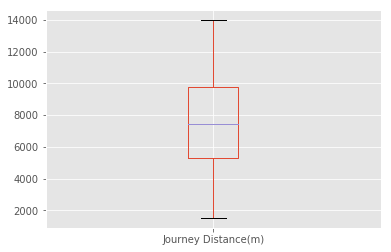

In [72]:
df3.boxplot(column='Journey Distance(m)')

* Looks like the outliers in Journey Distance were related to outliers in Travel time since Travel Time increases with Journey Distance. So removing outliers from Travel time also removed the outlier datapoints for Journey Distance. 

#### Examining outliers in Fare

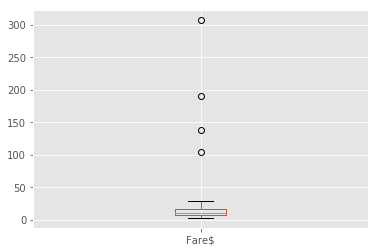

In [73]:
df3.boxplot(column='Fare$')

* Removing outliers from Fare

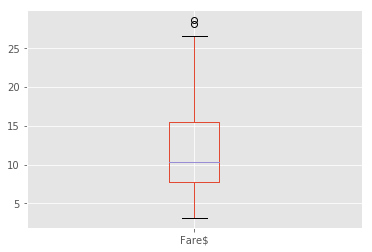

In [74]:
df3 = remove_outlier(df3, "Fare$")
df3.boxplot(column='Fare$')

In [75]:
df1.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1894121772,0,2,7,-37.815019,144.945159,-37.861835,144.905716,9553.0,2018-04-01,09:46:21,3194.76,10:39:35,8.70
1,ID1190628672,0,9,2,-38.110916,144.654173,-37.815365,144.941289,42145.0,2018-04-17,19:30:33,10098.54,22:18:51,15.28
2,ID3408994706,1,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-07-04,21:50:32,12681.06,1:21:53,61.93
3,ID1449124863,0,5,7,-37.799751,144.935380,-37.861835,144.905716,13688.0,2018-02-03,07:45:19,4282.62,8:56:41,10.78
4,ID5138364089,2,3,7,-37.815406,144.977574,-37.861835,144.905716,8694.0,2018-07-06,20:03:27,3002.82,20:53:29,288.59


In [76]:
df2.head()

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare,TimeOfDay,weekend,lm_fare
0,ID5259808658,2.0,8,6,-37.807202,145.026637,-37.773845,144.983689,8606.0,2018-07-15,13:18:43,2001.84,13:52:04,176.63,1,1,176.690646
1,ID1636186941,0.0,7,4,-37.861835,144.905716,-37.808925,145.008836,12067.0,2018-04-16,00:30:33,3818.40,1:34:11,15.49,2,0,16.081171
2,ID3674911830,1.0,6,1,-37.790797,144.985865,-37.811828,144.967575,3443.0,2018-03-17,23:41:36,982.68,23:57:58,23.95,2,1,24.344194
3,ID3809401056,1.0,6,1,-37.773845,144.983689,-37.821160,144.955435,6554.0,2018-06-17,06:48:46,1438.38,7:12:44,16.15,0,1,15.039341
4,ID1856834077,0.0,2,4,-37.815214,144.935503,-37.803361,144.990553,6308.0,2018-04-15,13:32:13,1539.84,13:57:52,13.06,1,1,13.039664


In [77]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
2,2,ID3992485703,1,5,8,-37.801311,144.921233,-37.815834,145.046450,11365.0,2018-04-22,05:07:28,3189.96,6:00:37,28.62
4,4,ID1439902035,0,3,4,-37.810580,145.000762,-37.803765,145.005667,1518.0,2018-05-23,17:52:14,375.42,17:58:29,7.38
5,5,ID1211049648,0,1,7,-37.804639,144.945114,-37.861835,144.905716,10032.0,2018-02-26,00:12:28,3318.96,1:07:46,15.22
6,6,ID1127774842,0,7,4,-37.861835,144.905716,-37.813154,145.009558,11980.0,2018-06-08,11:28:11,3751.14,12:30:42,9.66
9,9,ID3839095183,1,8,3,-37.807202,145.026637,-37.825367,144.982814,5901.0,2018-02-23,06:49:55,1459.32,7:14:14,8.51


In [78]:
# Dropping Extra columns
df2.drop(['TimeOfDay','weekend','lm_fare'], axis=1, inplace=True)

* Writing Data Frames To Files

In [79]:
df1.to_csv('29968550_dirty_data_solution.csv')
df2.to_csv('29968550_missing_value_solution.csv')
df3.to_csv('29968550_outliers_solution.csv')